Task description
----------------
>The file task_data.csv contains an example data set that has been artificially
generated. The set consists of 400 samples where for each sample there are 10
different sensor readings available. The samples have been divided into two
classes where the class label is either 1 or -1. The class labels define to what
particular class a particular sample belongs.

>Your task is to rank the sensors according to their importance/predictive power
with respect to the class labels of the samples. Your solution should be a
Python script or a Jupyter notebook file that generates a ranking of the sensors
from the provided CSV file. The ranking should be in decreasing order where the
first sensor is the most important one. Additionally, please include an analysis of your method and results, with
possible topics including:
>* your process of thought, i.e., how did you come to your solution?
>* properties of the artificially generated data set
>* strengths of your method: why does it produce a reasonable result?
>* weaknesses of your method: when would the method produce inaccurate results?
>* scalability of your method with respect to number of features and/or samples
>* alternative methods and their respective strengths, weaknesses, scalability

>Hint: There are many reasonable solutions to our task.
We are looking for good, insightful ones that are the least arbitrary. Please
beware of the quality of the code as well.

## Process and analysis

The task is a supervised learning problem as we want to label some observations based on sensor data that we will train a model on. It is also a classification rather regression problem as the target label is a binary -1 or 1. Some of the models that can be used to tackle this problem include K-nearest-neighbors, Logsitic Regression, Support vector machines, Neural Networks and Decision Trees.

After running Exploratory Data Analysis and describing the data, I will use the **Decision Trees** algorithm for this case. The advantages of decision trees is that they are computationally quick, easy to explain (as opposed to e.g. neural networks), and robust to outliers (although not relevant for this case).. Additionally, for the task at hand, a decision tree model has a **feature_importances_** attribute that can be used to rank which features were most important in making classficiation decisions.

The disadvantage of decision trees is that they are largely instable if data were changed. If the data were real-time sensor data, the model's accuracy will not hold. In that case, Random Forests can be used as they are more robust to change, but at the cost of simplicity and speed. Random forests also have the **feature_importances_** attribute.

In [1]:
# Importing necessary packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Set path here
path = '../eng_f/Downloads/task_ML/task/task_data.csv'

# Reading the csv file and ensuring that the label column is of category type
df = pd.read_csv(path, dtype = {'class_label': 'category'})

In [2]:
# Running basic EDA
display(df.head())
print(df.info())

# Distribution of labels
print("\nDistribution of labels")
print(df.class_label.value_counts())

# Calculating and displaying features correlations
corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sample index  400 non-null    object  
 1   class_label   400 non-null    category
 2   sensor0       400 non-null    float64 
 3   sensor1       400 non-null    float64 
 4   sensor2       400 non-null    float64 
 5   sensor3       400 non-null    float64 
 6   sensor4       400 non-null    float64 
 7   sensor5       400 non-null    float64 
 8   sensor6       400 non-null    float64 
 9   sensor7       400 non-null    float64 
 10  sensor8       400 non-null    float64 
 11  sensor9       400 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usage: 35.0+ KB
None

Distribution of labels
1.0     200
-1.0    200
Name: class_label, dtype: int64


,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
sensor0,1.00,-0.22,0.02,0.25,0.30,0.16,-0.01,0.08,0.36,0.00
sensor1,-0.22,1.00,0.06,-0.11,-0.13,0.06,-0.11,0.03,-0.16,-0.02
sensor2,0.02,0.06,1.00,0.09,-0.02,-0.01,-0.06,0.01,-0.01,-0.06
sensor3,0.25,-0.11,0.09,1.00,0.30,0.04,-0.11,0.00,0.29,0.01
sensor4,0.30,-0.13,-0.02,0.30,1.00,0.18,-0.02,0.09,0.38,0.02
sensor5,0.16,0.06,-0.01,0.04,0.18,1.00,-0.06,0.02,0.22,0.07
sensor6,-0.01,-0.11,-0.06,-0.11,-0.02,-0.06,1.00,0.07,-0.07,0.04
sensor7,0.08,0.03,0.01,0.00,0.09,0.02,0.07,1.00,0.06,0.06
sensor8,0.36,-0.16,-0.01,0.29,0.38,0.22,-0.07,0.06,1.00,-0.03
sensor9,0.00,-0.02,-0.06,0.01,0.02,0.07,0.04,0.06,-0.03,1.00


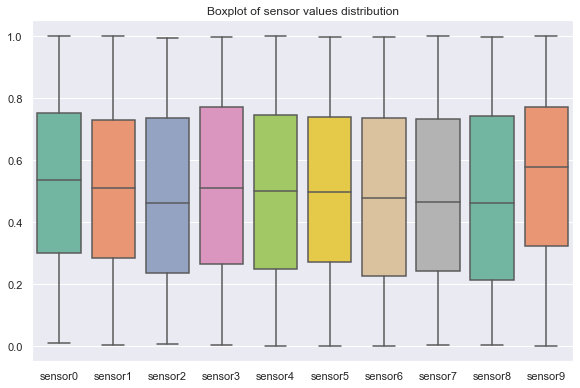

In [3]:
# Box plot of the features
sns.set(rc={'figure.figsize':(9.7,6.27)})
f = sns.boxplot(data=df, palette="Set2")
f.set_title('Boxplot of sensor values distribution')
plt.show()

## Data properties & Modelling

After the EDA it is clear that the data is quite clean. There are no missing values, all sensor data vary between 0 and 1 with close mean and median values and no outliers. There is some correlation between sensors, especially sensor 8 with 4 other sensors, but it is not high enough to warrant further preprocessing. The data is also perfectly symmetric with 200 cases for each label, which means there's no need for resampling as there are no majority/minority classes.<br><br> The dataset also does not need scaling (it is already normalized), therefore I will go ahead with splitting the data into traning and test sets and fitting a Decision Tree Classifier into it. As this is binary classification on label-symmetric data with no special weight given to either label, I will go with simple accuracy to evaluate the performance of the model. Using **GridSearchCV**, I will use the **max_depth** with the highest score to tune the model.

In [53]:
# Seperating the data into features and label 
X = df.drop(['sample index', 'class_label'], axis = 1)
y = df.class_label

# Split data into 75% train and 35% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Creating a paramter grid to try max_depth on 
param_grid = {'max_depth': np.arange(2, 10)}

# Initializing a GridSearchCV object using decision tree and cross-validation
treeCV = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)

# Fitting the model to the data 
treeCV.fit(X_train, y_train)

print("The best max_depth is:", treeCV.best_params_)
print("with the corresponding accuracy of", treeCV.best_score_)

The best max_depth is: {'max_depth': 5}
with the corresponding accuracy of 0.9615384615384617


              precision    recall  f1-score   support

        -1.0       0.98      0.95      0.97        59
         1.0       0.96      0.99      0.98        81

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Sensor: 0, Score: 0.0000
Sensor: 1, Score: 0.0698
Sensor: 2, Score: 0.0213
Sensor: 3, Score: 0.0000
Sensor: 4, Score: 0.0379
Sensor: 5, Score: 0.0000
Sensor: 6, Score: 0.3188
Sensor: 7, Score: 0.0239
Sensor: 8, Score: 0.5282
Sensor: 9, Score: 0.0000


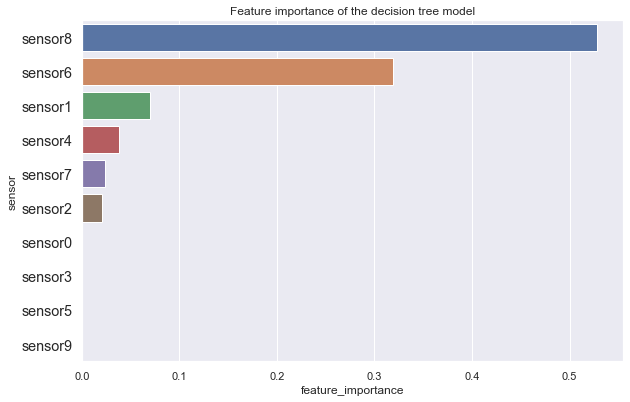

In [58]:
# Extract best model from 'treeCV'
clf = treeCV.best_estimator_

# Model evaluation metrics
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# get importance
importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Sensor: %0d, Score: %.4f' % (i,v))

# create an importance dataframe    
imp = pd.DataFrame([X.columns, importance]).transpose()
imp.columns = ['sensor', 'feature_importance']
    
# plot feature importance
sns.barplot(x="feature_importance", y='sensor', data=imp, order=imp.sort_values('feature_importance', ascending = False).sensor)
plt.yticks(ticks= np.arange(10), fontsize='large')
plt.title('Feature importance of the decision tree model')
plt.show()

## Discussion and conclusion

With accuracy over 92%, the model is quite successful. For the feature importance, we notice that the sensor with the highest correlation with other sensors (sensor8) was the most important. However this doesn't seem to be very relevant as sensor6 did not have any notable correlation with the other sensors. The decision trees minimally used 4 other sensors and ignored the rest for making classification decisions. This means that in principle the model can be easily scaled while dropping some features (sensors) that are not necessary to make predictions, therefore reducing the dimensions and complexity of the model. Although Decision Trees are relatively robust against outliers and missing values, for more scalable data, we can use ensemble methods such as voting classifiers, where classifiers 'vote' on the which the right label is. A demonstration below shows that accuracy improves slightly (but perhaps not meaningfully).

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier

# Split data into 75% train and 35% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state= 21)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=21)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5, random_state=21)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred))) 

Logistic Regression : 0.921
K Nearest Neighbours : 0.964
Decision Tree : 0.943
Voting Classifier: 0.957


In [60]:
!pip3 freeze > requirements.txt